In [3]:
import pandas as pd
import numpy as np
from sklearn import svm

In [5]:
?pd.read_table

In [49]:
even_otu=pd.read_table("../../../../lihua/even_otu_table_taxo_name.txt", skiprows=1)
even_otu=even_otu.drop(columns='taxonomy')

/home/yhy/old-partition/home/yhy/anaconda3/envs/tongren/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3050: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [58]:
%%time
even_otuNum=np.loadtxt("../../../../lihua/even_otu_matrix_number.txt", delimiter="\t", ndmin=1)

CPU times: user 2min 55s, sys: 19.3 s, total: 3min 14s
Wall time: 3min 13s


In [87]:
print(even_otuNum.shape)
#boxplot(even_otuNum.T, showfliers=False)

(661879, 579)


In [88]:
even_otuNum

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [69]:
even_otu.set_index('#OTU ID', inplace=True)

In [71]:
even_otu.describe()

,19500001,19500003,19500004,19500005,19500006,19500010,19500011,19500014,19500016,19500017,...,BJ0058276,BJ0058280,BJ0058285,BJ0058286,BJ0058288,BJ0058292,BJ0058295,BJ0058297,BJ0058299,Unknown1
count,661879.000000,661879.000000,661879.000000,661879.000000,661879.000000,661879.000000,661879.000000,661879.000000,661879.000000,661879.000000,...,661879.000000,661879.000000,661879.000000,661879.000000,661879.000000,661879.000000,661879.000000,661879.000000,661879.000000,661879.000000
mean,0.035547,0.035547,0.035547,0.035547,0.035547,0.035547,0.035547,0.035547,0.035547,0.035547,...,0.035547,0.035547,0.035547,0.035547,0.035547,0.035547,0.035547,0.035547,0.035547,0.035547
std,5.739384,2.827278,4.941334,6.951686,3.492022,4.602660,5.704012,4.917011,8.448640,7.999124,...,5.741091,3.016275,5.240773,6.000074,4.923563,5.283615,4.434566,6.034411,5.356064,2.515767
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2840.000000,1389.000000,2674.000000,3044.000000,2092.000000,2498.000000,3937.000000,2376.000000,4042.000000,5345.000000,...,4020.000000,1134.000000,3875.000000,4169.000000,2869.000000,2274.000000,2501.000000,3549.000000,2512.000000,1113.000000


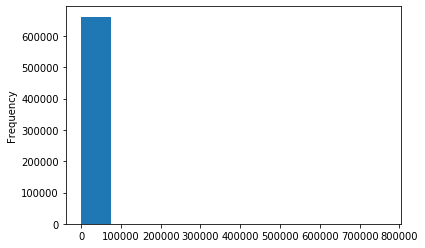

In [74]:
even_otu.sum(axis=1).plot.hist()

In [76]:
otu_filter=even_otu[even_otu.sum(axis=1)>0]
otu_filter.shape

(661879, 579)

In [53]:
from pylab import boxplot
boxplot(even_otu.drop(columns='#OTU ID'), showfliers=False)

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7f4efa989700> (for post_execute):


KeyboardInterrupt: 

In [31]:
even_otu=even_otu.T

In [ ]:
group_list=pd.read_table("../../../../lihua/mapping.txt", index_col=0)
group_list

In [39]:
even_otu_merge=even_otu.merge(group_list["Treatment"], left_index=True, right_index=True)
even_otu_merge

,0,1,2,3,4,5,6,7,8,9,...,661870,661871,661872,661873,661874,661875,661876,661877,661878,Treatment
19500001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,T2DM
19500003,0,0,0,1,0,0,0,33,0,0,...,0,0,0,0,0,0,0,0,1,T2DM
19500004,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,T2DM
19500005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,T2DM
19500006,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,T2DM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BJ0058292,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,T2DM
BJ0058295,0,0,0,0,0,0,0,43,0,0,...,0,0,0,0,0,0,0,0,0,Control
BJ0058297,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Control
BJ0058299,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Control


In [82]:
from sklearn.model_selection import train_test_split
X=even_otu_merge.iloc[:,:-1]
y=even_otu_merge["Treatment"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [83]:
clf = svm.SVC(kernel='linear', gamma='scale')
#clf.fit(even_otu_merge.drop(columns="Treatment"), even_otu_merge["Treatment"].replace(["T2DM", "Control"], [1, 0]))
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [86]:
from sklearn.metrics import accuracy_score
y_pre=clf.predict(X_test)
accuracy_score(y_test, y_pre)

0.6206896551724138

In [89]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(X_train, y_train)
y_pre=clf.predict(X_test)
accuracy_score(y_test, y_pre)

0.5862068965517241

In [90]:
clf = MLPClassifier()
clf.fit(X_train, y_train)
y_pre=clf.predict(X_test)
accuracy_score(y_test, y_pre)

/home/yhy/old-partition/home/yhy/anaconda3/envs/tongren/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.6551724137931034

In [93]:
from sklearn import linear_model
clf = linear_model.Lasso()
clf.fit(X_train, y_train)
y_pre=clf.predict(X_test)
accuracy_score(y_test, y_pre)

ValueError: could not convert string to float: 'T2DM'